In [1]:
import pygplates
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('/Users/Simon/GIT/GPlatesClassStruggle/')
sys.path.append('/Users/Simon/GIT/worselands/')

from reconstruction_classes import *
from raster_reconstruction_classes import *
from worselands_utils import grdcontour2feature

%matplotlib inline
%load_ext autoreload
%autoreload 2



(721,) (361,) (361, 721)


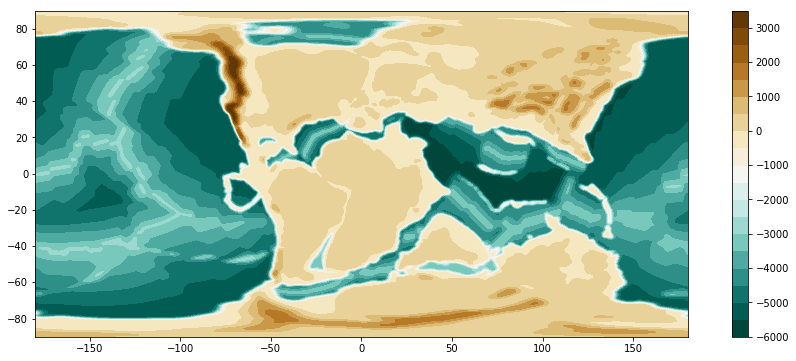

In [2]:
grdfile_template = '../../paleotopography/paleotopo_grids_netcdf4/paleotopobathy_smooth_%0.2fMa.nc'

reconstruction_time = 120
ptopo = GplatesRaster(grdfile_template % reconstruction_time)

print ptopo.gridX.shape, ptopo.gridY.shape, ptopo.gridZ.shape

ptopo.plot()


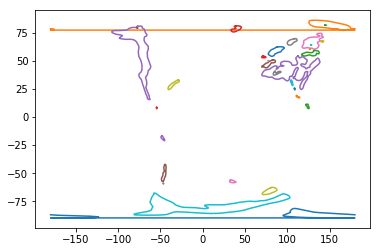

In [60]:
clevel = 500
polygons = grdcontour2feature(grdfile_template % reconstruction_time,clevel)

for polygon in polygons:
    plt.plot(polygon.get_geometry().to_lat_lon_array()[:,1],
             polygon.get_geometry().to_lat_lon_array()[:,0])


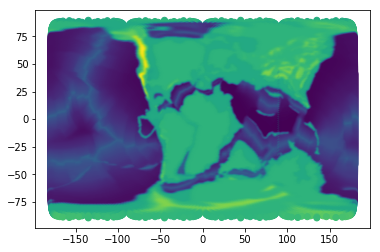

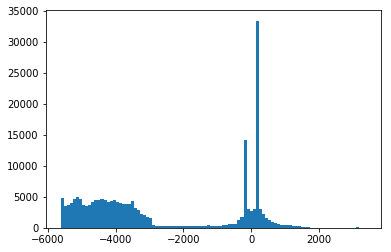

In [61]:
equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=128)

ptopo_ea = ptopo.sample(equal_area_points.longitude,equal_area_points.latitude)

plt.scatter(equal_area_points.longitude,equal_area_points.latitude,c=ptopo_ea)
plt.show()

ind = np.isnan(ptopo_ea)
plt.hist(ptopo_ea[~ind],bins=100)
plt.show()


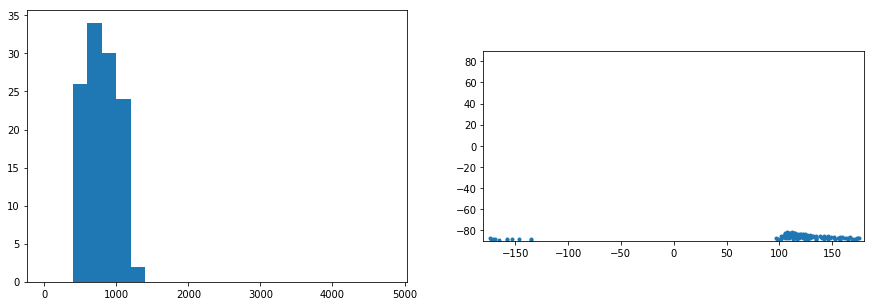

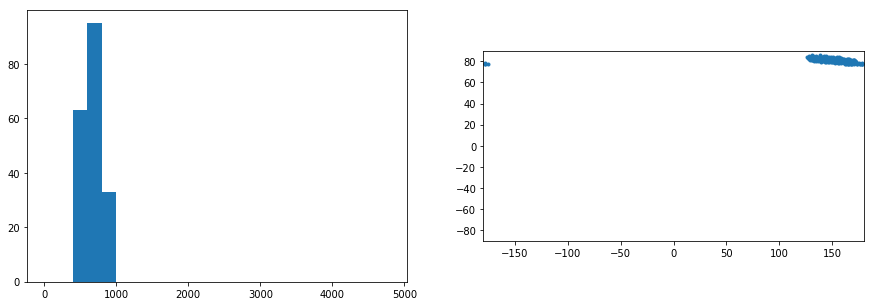

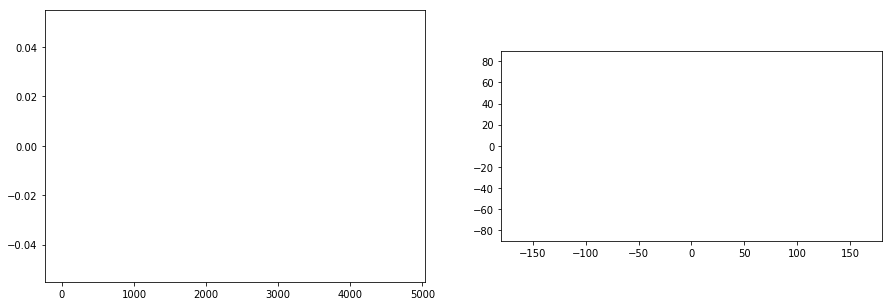

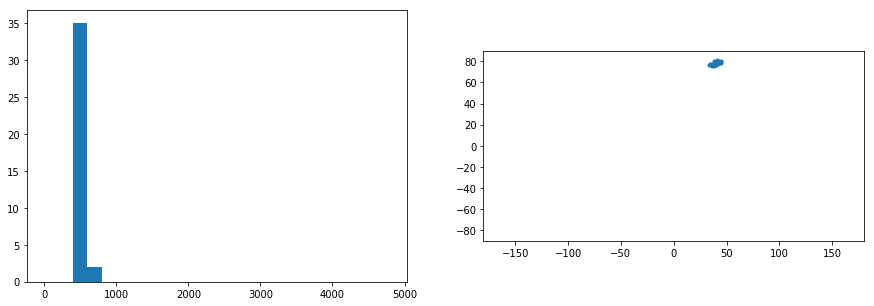

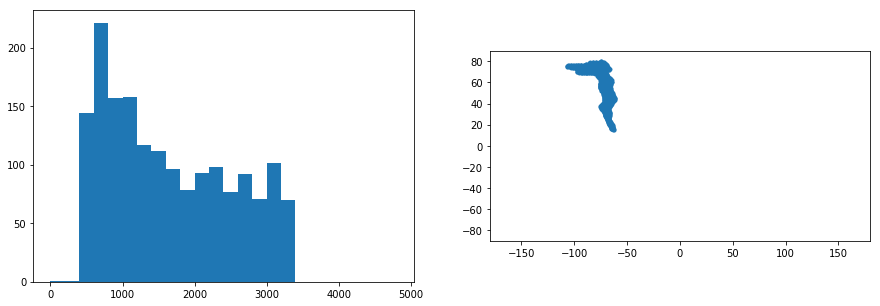

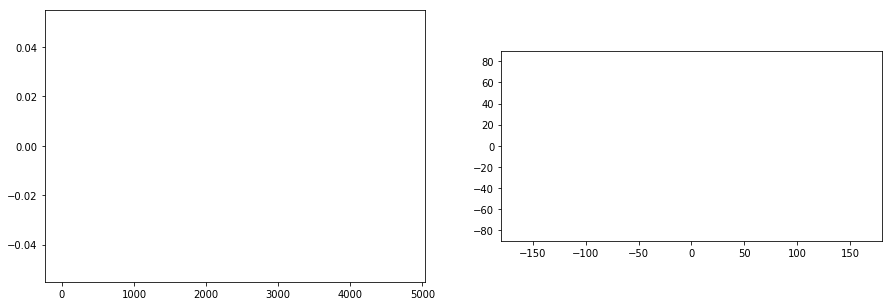

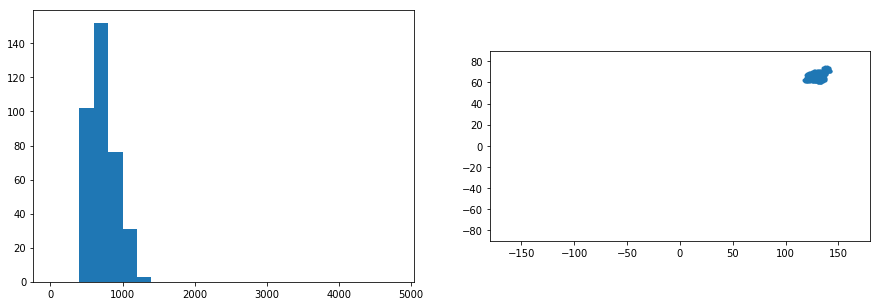

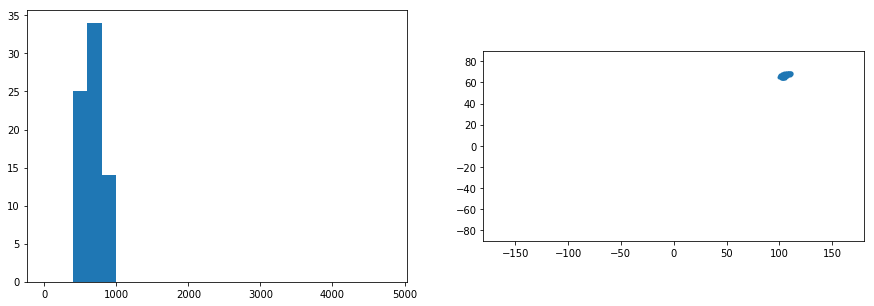

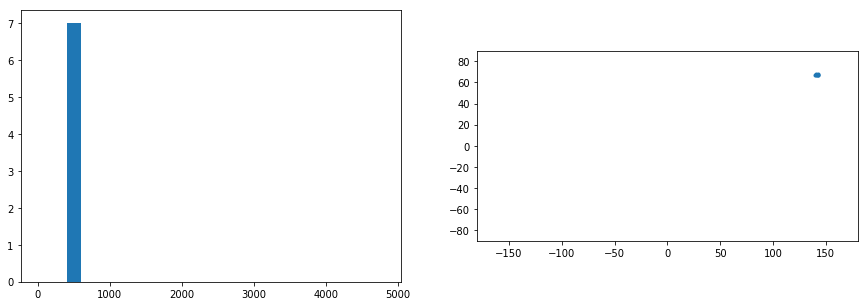

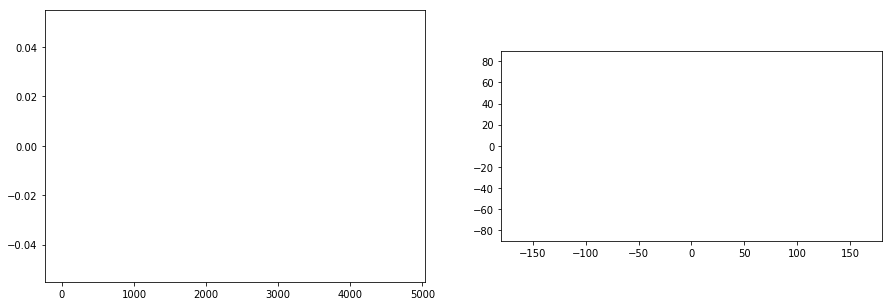

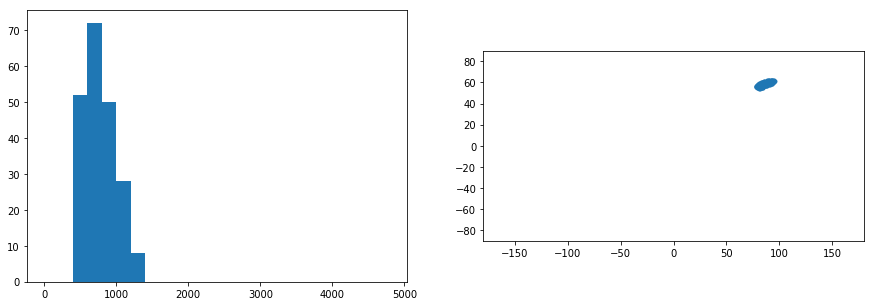

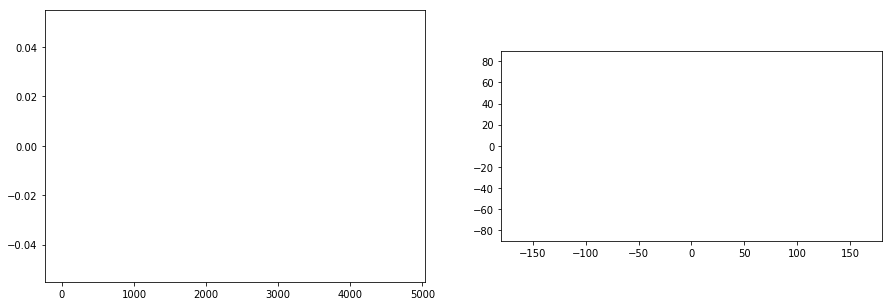

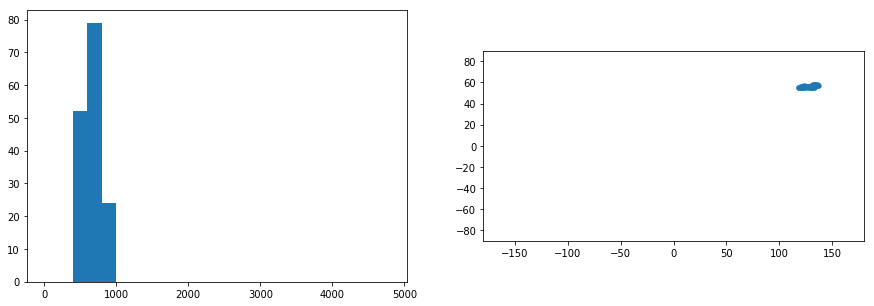

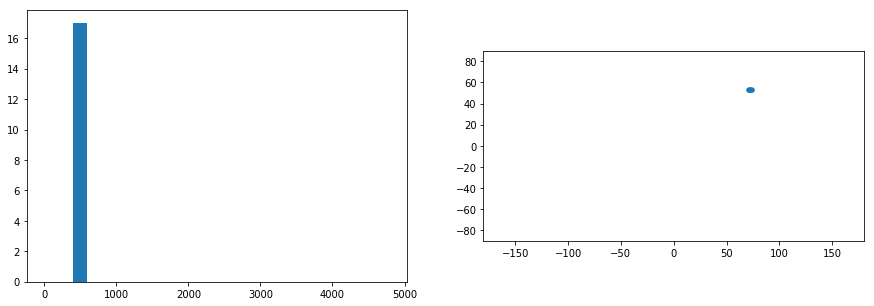

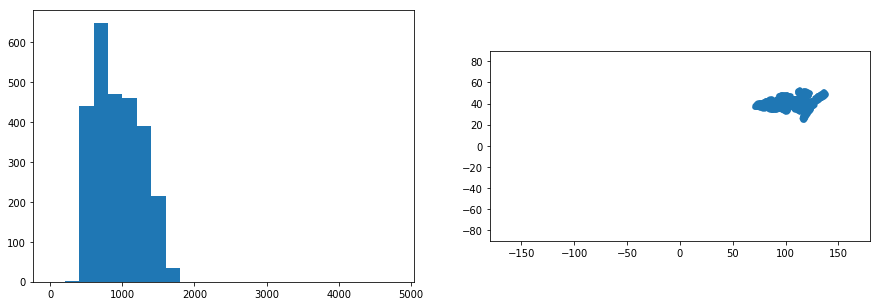

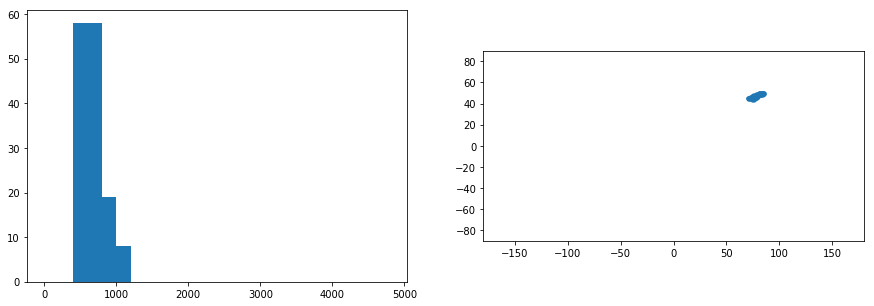

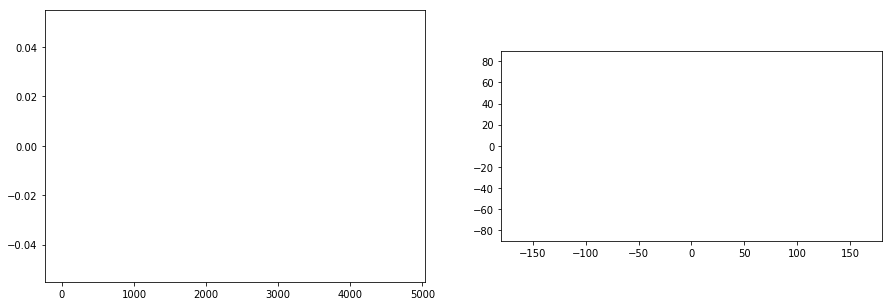

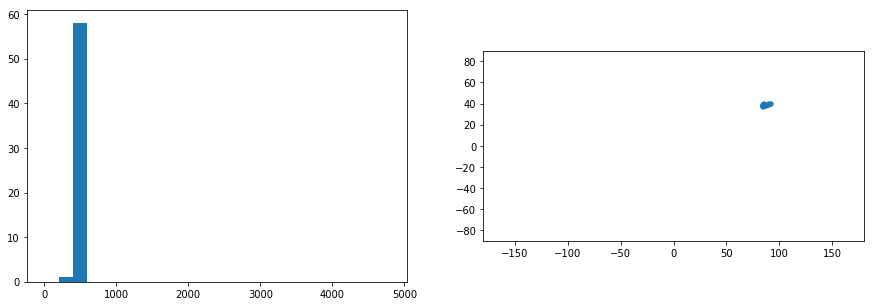

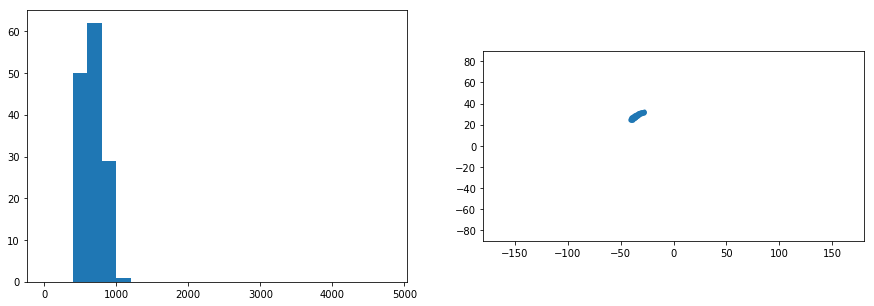

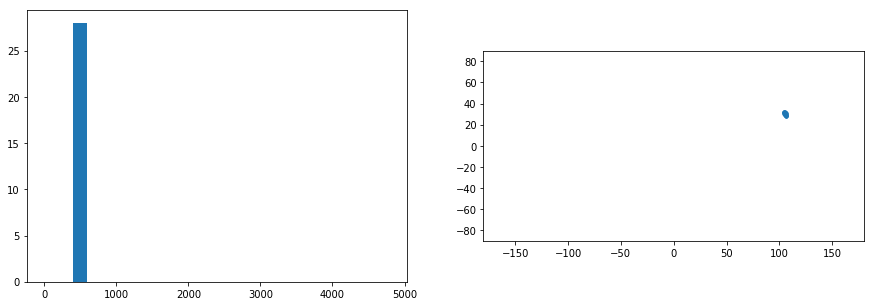

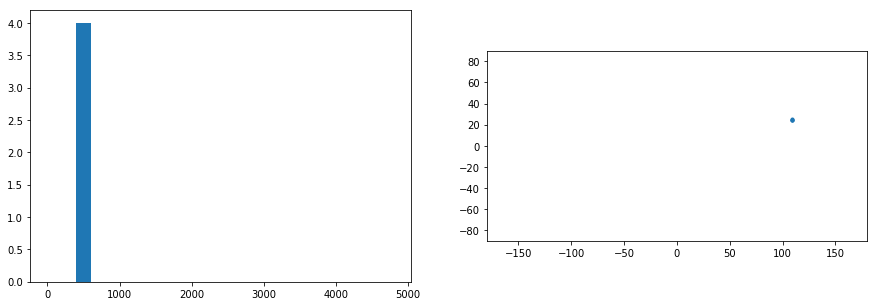

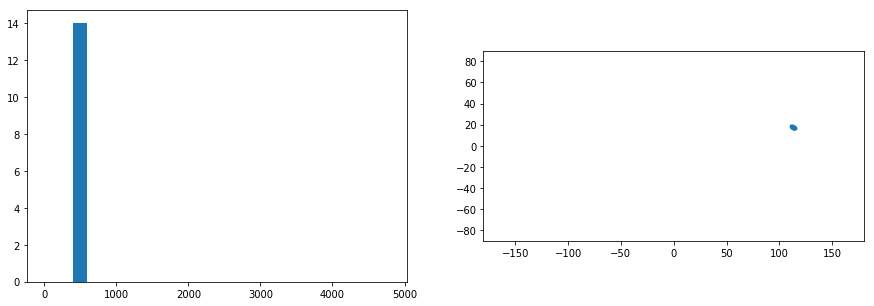

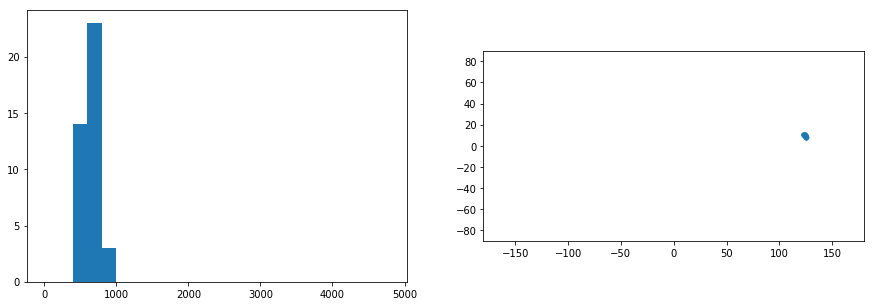

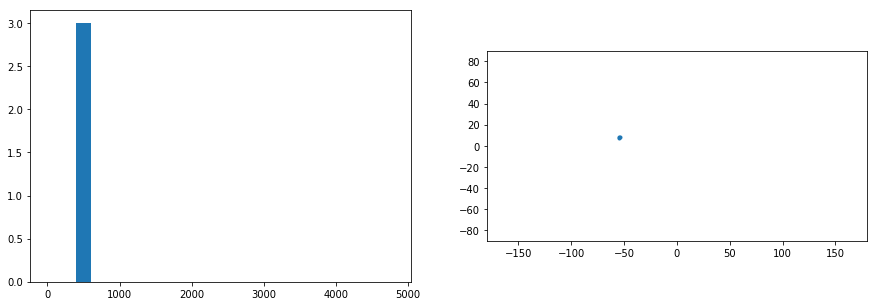

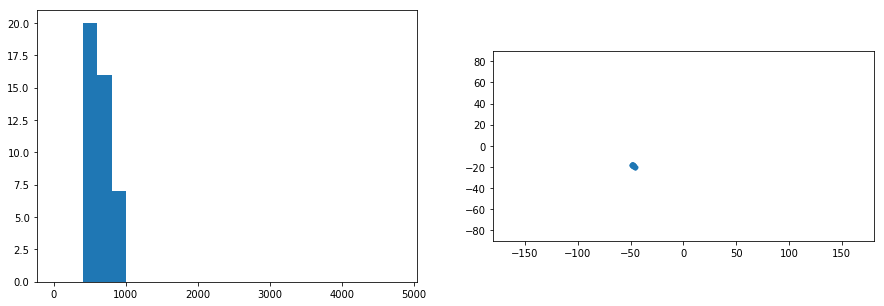

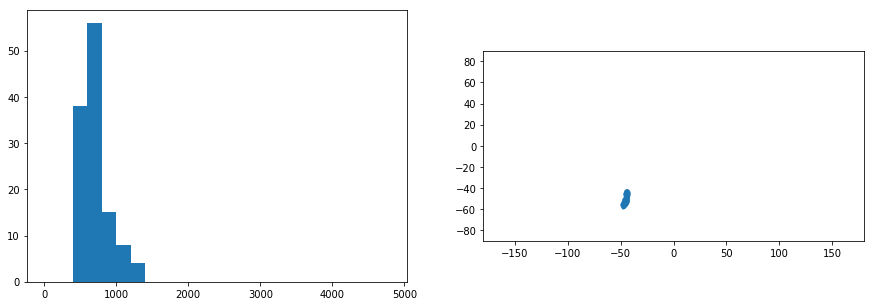

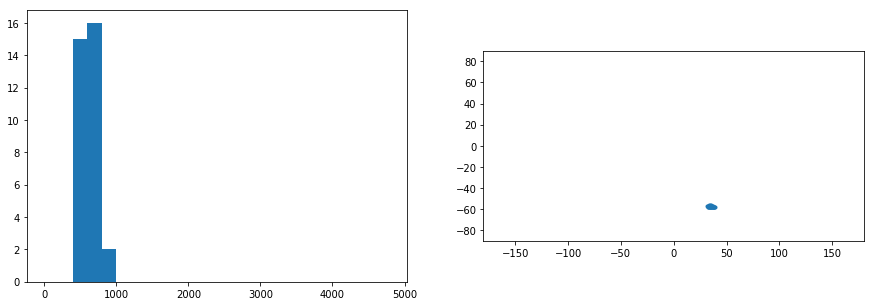

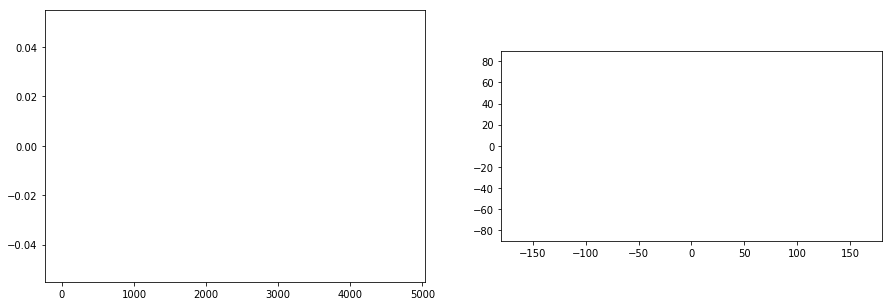

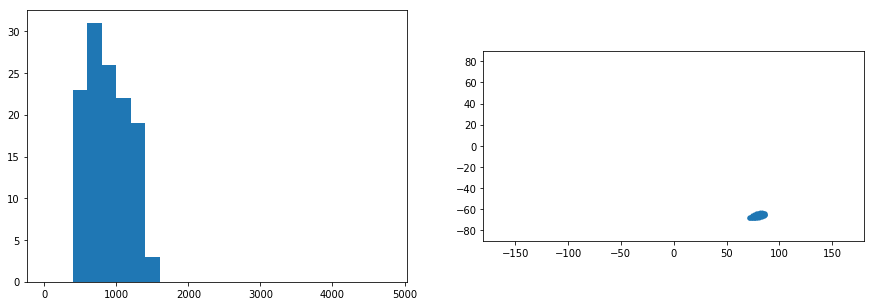

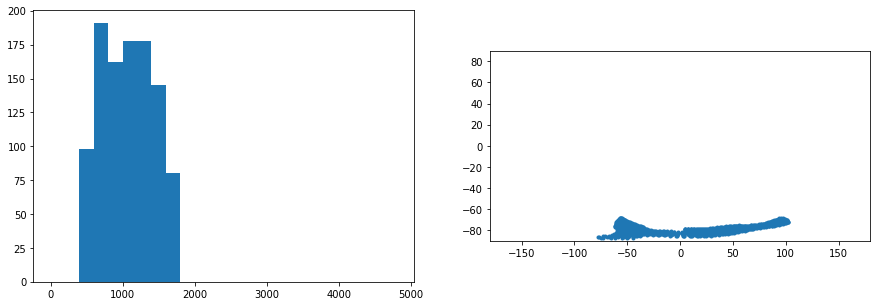

In [62]:
import polygon_processing as pp

#polygons_containing_points = pp.points_in_polygons.find_polygons(equal_area_points.multipoint, 
#                                                                 [polygon.get_geometry() for polygon in polygons])

for polygon in polygons:
    polygon_containing_points = pp.points_in_polygons.find_polygons(equal_area_points.multipoint, 
                                                                    [polygon.get_geometry()])

    lons = []
    lats = []
    range_topo = []
    for pcp,point,point_topo in zip(polygon_containing_points,equal_area_points.multipoint.get_points(),ptopo_ea):
        if pcp is not None:
            lons.append(point.to_lat_lon()[1])
            lats.append(point.to_lat_lon()[0])
            range_topo.append(point_topo)
    
    range_topo_array = np.array(range_topo)
    ind = np.isnan(range_topo_array)
    
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.hist(range_topo_array[~ind],bins=np.arange(0,5000,200))
    plt.subplot(122)
    plt.plot(lons,lats,'.')
    plt.axis([-180, 180, -90, 90])
    plt.gca().set_aspect('equal')
    plt.show()

